# Generating Data

In [38]:
import datetime
import yfinance as yf
import numpy as np

stocks = ['KBANK.BK', 'DTAC.BK', 'TOP.BK', 'AOT.BK', 'CENTEL.BK', 'MINT.BK']
timePeriod = start= datetime.datetime.now() - datetime.timedelta(days=1*365)
data = yf.download(stocks, timePeriod.strftime("%Y-%m-%d"), progress=False)
data = data['Close']

log_returns = np.log(data/data.shift())
log_returns

,AOT.BK,CENTEL.BK,DTAC.BK,KBANK.BK,MINT.BK,TOP.BK
Date,,,,,,
2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-14,-0.004598,-0.046520,-0.013158,0.016529,-0.020726,-0.011765
2020-07-15,0.018265,0.028171,0.026145,0.005450,0.005222,0.023393
2020-07-16,-0.004535,0.013793,0.025479,-0.008186,-0.031749,-0.017493
2020-07-17,0.013544,-0.009174,0.012500,-0.011019,0.021277,0.011696
...,...,...,...,...,...,...
2021-07-05,-0.008065,0.000000,-0.008299,-0.017022,-0.016950,0.009217
2021-07-06,0.008065,0.015152,0.008299,0.012793,0.025318,0.000000
2021-07-07,-0.008065,-0.015152,0.000000,-0.008511,0.000000,-0.027909


# Monte Carlo Simulation

In [39]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, len(stocks)))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(len(stocks))
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [40]:
sharpe_ratios.max()

0.9848801195355509

In [41]:
sharpe_ratios.argmax()

4932

In [42]:
weights[sharpe_ratios.argmax()]

array([2.93110170e-02, 4.25750776e-01, 9.25822465e-05, 1.45574967e-01,
       2.83305517e-01, 1.15965142e-01])

In [43]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [35]:
sharpeRatio.max()

0.4642006100307731

<IPython.core.display.Javascript object>


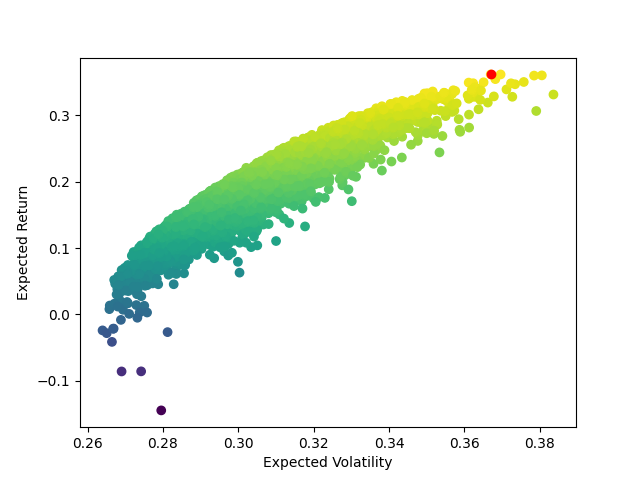

Text(0, 0.5, 'Expected Return')

In [44]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')